# Options Math
- Pricing options with known inputs
- Compiling option payoff diagrams
- Returns greek risk metrics of an option
- Solving for the implied volatility of an option 

In [1]:
import numpy as np
from scipy.stats import norm
import opstrat as op

## Pricing the Option with Opstrat engine

In [2]:
#Declare parameters

St = 53.69
K = 52
r = 0.02 
T = 0.044
v= 0.2

bsm=op.black_scholes(K=K, St=St, r=r, t=T, v=v, type='c')
print('Option Price is:',(bsm['value']['option value']))

Option Price is: 1.690001253698611


## Options Payoff Diagram

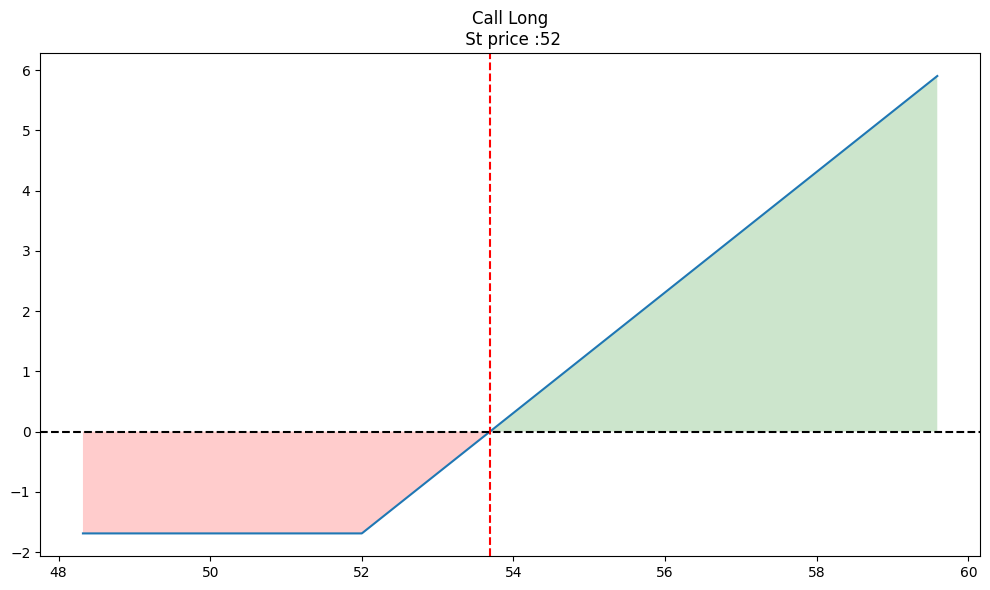

In [3]:
op.single_plotter(spot=St,strike=K,op_type='c',tr_type='b',op_pr=bsm['value']['option value'])

## The Greeks

In [4]:
print('Option Delta is:',bsm['greeks']['delta'])

Option Delta is: 1.0


In [5]:
print('Option Gamma is:',bsm['greeks']['gamma'])

Option Gamma is: 0.0


In [6]:
print('Option Theta is:',bsm['greeks']['theta'])

Option Theta is: -2.8493149997973365e-05


In [7]:
print('Option Vega is:',bsm['greeks']['vega'])

Option Vega is: 0.0


## Solving for Implied Volatility

In [8]:
N_prime = norm.pdf
N = norm.cdf

def black_scholes_call(S, K, T, r, sigma):

    ###standard black-scholes formula
    d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    return S * N(d1) -  N(d2)* K * np.exp(-r * T)

volatility_candidates = np.arange(0.01,4,0.0001)
price_differences = np.zeros_like(volatility_candidates)

observed_price = bsm['value']['option value']

for i in range(len(volatility_candidates)):
    
    candidate = volatility_candidates[i]
    
    price_differences[i] = observed_price - black_scholes_call(St, K , T, r, candidate)
    
    
idx = np.argmin(abs(price_differences))
implied_volatility = volatility_candidates[idx]
print('Implied volatility for option is:', implied_volatility)

Implied volatility for option is: 0.019399999999999945
